In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
train["Qualification"].value_counts()

BDS                                                                            488
BHMS                                                                           477
BAMS                                                                           471
MBBS                                                                           334
MBBS, MS - ENT                                                                 220
                                                                              ... 
MBBS, DPM (Psychiatry), M.D. (Psychiatry)                                        1
BAMS, MS                                                                         1
MBBS, Master of Public Health (MPH), DDVL                                        1
MDS - Periodontology and Oral Implantology, BDS, Ph.D(Doctor of Philosophy)      1
BDS, Diploma in Naturopathy & Yoga (NDDY)                                        1
Name: Qualification, Length: 1420, dtype: int64

In [6]:
test['Qualification'].value_counts()

BAMS                                                                                       153
BHMS                                                                                       150
BDS                                                                                        144
MBBS                                                                                       107
MBBS, MD - Dermatology                                                                      64
                                                                                          ... 
MD - General Medicine, DNB, Diploma in Geriatric Medicine                                    1
BAMS, MD - Ayurveda Medicine, Fellowship in Sexual Medicine, Fellowship in Rheumatology      1
MBBS, MD - Alternate Medicine                                                                1
MBBS, DNB - General Medicine, Post Graduate Diploma in Diabetology (PGDD)                    1
MDS - Periodontics                                

In [7]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [9]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [10]:
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [11]:
train[['Experience','year','E']]= train.Experience.str.split(expand=True)
test[['Experience','year','E']]= test.Experience.str.split(expand=True)

In [12]:
train['District'] = train['Place'].str.split(',').str[0]
train['City'] = train['Place'].str.split(',').str[1]
test['District'] = test['Place'].str.split(',').str[0]
test['City'] = test['Place'].str.split(',').str[1]
train['Q1'] = train['Qualification'].str.split(',').str[0]
train['Q2'] = train['Qualification'].str.split(',').str[1]
train['Q3'] = train['Qualification'].str.split(',').str[2]
test['Q1'] = test['Qualification'].str.split(',').str[0]
test['Q2'] = test['Qualification'].str.split(',').str[1]
test['Q3'] = test['Qualification'].str.split(',').str[2]

In [13]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,year,E,District,City,Q1,Q2,Q3
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,years,experience,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,years,experience,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,years,experience,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,years,experience,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,years,experience,Keelkattalai,Chennai,BAMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,years,experience,Basavanagudi,Bangalore,MBBS,MS - ENT,NaN
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,years,experience,Nungambakkam,Chennai,MBBS,NaN,NaN
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,years,experience,Greater Kailash Part 2,Delhi,MBBS,NaN,NaN
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,years,experience,Vileparle West,Mumbai,MBBS,MD - General Medicine,NaN


In [14]:
train.drop(['year','E','Qualification','Miscellaneous_Info'],axis=1,inplace=True)
test.drop(['year','E','Qualification','Miscellaneous_Info'],axis=1,inplace=True) # since misc contains rating

In [15]:
train

,Experience,Rating,Place,Profile,Fees,District,City,Q1,Q2,Q3
0,24,100%,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN
1,12,98%,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,20,100%,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai,BAMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5956,19,98%,"Basavanagudi, Bangalore",ENT Specialist,300,Basavanagudi,Bangalore,MBBS,MS - ENT,NaN
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,100,Nungambakkam,Chennai,MBBS,NaN,NaN
5958,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,600,Greater Kailash Part 2,Delhi,MBBS,NaN,NaN
5959,15,90%,"Vileparle West, Mumbai",General Medicine,100,Vileparle West,Mumbai,MBBS,MD - General Medicine,NaN


In [16]:
train.dtypes

Experience    object
Rating        object
Place         object
Profile       object
Fees           int64
District      object
City          object
Q1            object
Q2            object
Q3            object
dtype: object

In [17]:
test['Experience'] = pd.to_numeric(test['Experience'],errors='coerce')
train['Experience'] = pd.to_numeric(train['Experience'],errors='coerce')

In [18]:
train.dtypes

Experience     int64
Rating        object
Place         object
Profile       object
Fees           int64
District      object
City          object
Q1            object
Q2            object
Q3            object
dtype: object

In [19]:
test.dtypes

Experience     int64
Rating        object
Place         object
Profile       object
District      object
City          object
Q1            object
Q2            object
Q3            object
dtype: object

In [20]:
test

,Experience,Rating,Place,Profile,District,City,Q1,Q2,Q3
0,35,NaN,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai,MBBS,NaN,NaN
1,31,NaN,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),NaN
2,40,70%,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai,MBBS,DDVL,NaN
3,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi,BAMS,NaN,NaN
4,16,100%,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,NaN
...,...,...,...,...,...,...,...,...,...
1982,10,NaN,"Basavanagudi, Bangalore",Ayurveda,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,NaN
1983,4,NaN,"Choolai, Chennai",Dermatologists,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,MBBS
1984,9,NaN,"Porur, Chennai",General Medicine,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,NaN
1985,12,98%,"Arekere, Bangalore",Dentist,Arekere,Bangalore,BDS,NaN,NaN


In [21]:
train['Q3'].value_counts()

 Venereology & Leprosy                                                185
 MBBS                                                                 114
 DNB - ENT                                                             68
 DNB - Dermatology & Venereology                                       35
 MS - ENT                                                              35
                                                                     ... 
 Advance Diploma in Nutrition and Dietetics                             1
 ACLS                                                                   1
 DM - Oncology                                                          1
 Certificate Course in Evidence Based Diabetes Management (CCEBDM)      1
 M.Ch - Orthopaedics                                                    1
Name: Q3, Length: 406, dtype: int64

In [22]:
train['Q2'].fillna('none',inplace=True)
train['Q3'].fillna('none',inplace=True)
test['Q2'].fillna('none',inplace=True)
test['Q3'].fillna('none',inplace=True)

In [23]:
train.head()

,Experience,Rating,Place,Profile,Fees,District,City,Q1,Q2,Q3
0,24,100%,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,none
1,12,98%,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,none
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,none
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,none
4,20,100%,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai,BAMS,none,none


In [24]:
test.head()

,Experience,Rating,Place,Profile,District,City,Q1,Q2,Q3
0,35,NaN,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai,MBBS,none,none
1,31,NaN,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),none
2,40,70%,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai,MBBS,DDVL,none
3,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi,BAMS,none,none
4,16,100%,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,none


In [25]:
train.drop('Place',axis=1,inplace=True)
test.drop('Place',axis=1,inplace=True)

In [26]:
train['Rating'].fillna('0%',inplace=True)
test['Rating'].fillna('0%',inplace=True)

In [27]:
train

,Experience,Rating,Profile,Fees,District,City,Q1,Q2,Q3
0,24,100%,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,none
1,12,98%,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,none
2,9,0%,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,none
3,12,0%,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,none
4,20,100%,Ayurveda,250,Keelkattalai,Chennai,BAMS,none,none
...,...,...,...,...,...,...,...,...,...
5956,19,98%,ENT Specialist,300,Basavanagudi,Bangalore,MBBS,MS - ENT,none
5957,33,0%,General Medicine,100,Nungambakkam,Chennai,MBBS,none,none
5958,41,97%,General Medicine,600,Greater Kailash Part 2,Delhi,MBBS,none,none
5959,15,90%,General Medicine,100,Vileparle West,Mumbai,MBBS,MD - General Medicine,none


In [28]:
test

,Experience,Rating,Profile,District,City,Q1,Q2,Q3
0,35,0%,General Medicine,Ghatkopar East,Mumbai,MBBS,none,none
1,31,0%,ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),none
2,40,70%,Dermatologists,KK Nagar,Chennai,MBBS,DDVL,none
3,0,0%,Ayurveda,New Ashok Nagar,Delhi,BAMS,none,none
4,16,100%,Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,none
...,...,...,...,...,...,...,...,...
1982,10,0%,Ayurveda,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,none
1983,4,0%,Dermatologists,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,MBBS
1984,9,0%,General Medicine,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,none
1985,12,98%,Dentist,Arekere,Bangalore,BDS,none,none


In [29]:
train['Rating']= train['Rating'].str.slice(stop=-1).astype(int)
test['Rating']= test['Rating'].str.slice(stop=-1).astype(int)
train["Rating"].replace(0,train['Rating'].mean(),inplace = True)
test["Rating"].replace(0,train['Rating'].mean(),inplace = True)

In [30]:
train

,Experience,Rating,Profile,Fees,District,City,Q1,Q2,Q3
0,24,100.000000,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,none
1,12,98.000000,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,none
2,9,42.217245,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,none
3,12,42.217245,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,none
4,20,100.000000,Ayurveda,250,Keelkattalai,Chennai,BAMS,none,none
...,...,...,...,...,...,...,...,...,...
5956,19,98.000000,ENT Specialist,300,Basavanagudi,Bangalore,MBBS,MS - ENT,none
5957,33,42.217245,General Medicine,100,Nungambakkam,Chennai,MBBS,none,none
5958,41,97.000000,General Medicine,600,Greater Kailash Part 2,Delhi,MBBS,none,none
5959,15,90.000000,General Medicine,100,Vileparle West,Mumbai,MBBS,MD - General Medicine,none


In [31]:
test

,Experience,Rating,Profile,District,City,Q1,Q2,Q3
0,35,65.602809,General Medicine,Ghatkopar East,Mumbai,MBBS,none,none
1,31,65.602809,ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),none
2,40,70.000000,Dermatologists,KK Nagar,Chennai,MBBS,DDVL,none
3,0,65.602809,Ayurveda,New Ashok Nagar,Delhi,BAMS,none,none
4,16,100.000000,Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,none
...,...,...,...,...,...,...,...,...
1982,10,65.602809,Ayurveda,Basavanagudi,Bangalore,BAMS,Doctor of Medicine,none
1983,4,65.602809,Dermatologists,Choolai,Chennai,MD - Dermatology,Venereology & Leprosy,MBBS
1984,9,65.602809,General Medicine,Porur,Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,none
1985,12,98.000000,Dentist,Arekere,Bangalore,BDS,none,none


In [32]:
train.dtypes

Experience      int64
Rating        float64
Profile        object
Fees            int64
District       object
City           object
Q1             object
Q2             object
Q3             object
dtype: object

In [33]:
test.dtypes

Experience      int64
Rating        float64
Profile        object
District       object
City           object
Q1             object
Q2             object
Q3             object
dtype: object

In [34]:
encode= ['Profile','District','City','Q1','Q2','Q3']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in encode:
    train[i]=le.fit_transform(train[i].astype(str))
    test[i]=le.fit_transform(test[i].astype(str))

In [35]:
train.head()

,Experience,Rating,Profile,Fees,District,City,Q1,Q2,Q3
0,24,100.000000,5,100,296,4,8,252,406
1,12,98.000000,0,350,855,0,5,241,406
2,9,42.217245,3,300,452,0,79,334,406
3,12,42.217245,0,250,68,0,12,7,406
4,20,100.000000,0,250,335,1,5,426,406


In [36]:
test.head()

,Experience,Rating,Profile,District,City,Q1,Q2,Q3
0,35,65.602809,4,142,6,48,243,195
1,31,65.602809,3,577,5,48,79,195
2,40,70.000000,2,212,1,48,28,195
3,0,65.602809,0,373,3,1,243,195
4,16,100.000000,1,231,0,2,157,195


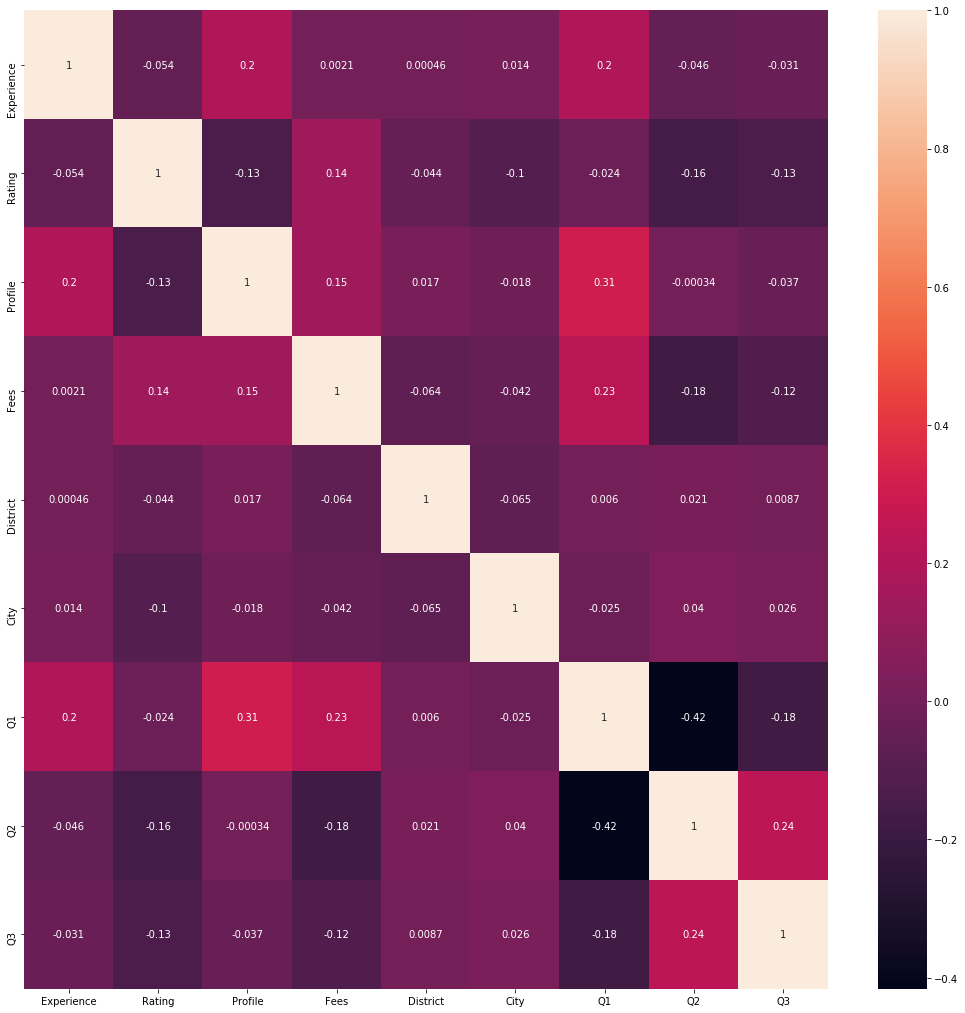

In [37]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()

In [38]:
x = train.drop(['Fees'],axis=1)
y = train["Fees"]
df_x = train.drop(["Fees"],axis=1)

In [39]:
x.shape

(5961, 8)

In [40]:
y.shape

(5961,)

In [41]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,Experience,Rating,Profile,District,City,Q1,Q2,Q3
0,0.737357,1.213939,1.420559,-0.310253,0.483727,-0.950832,-0.316957,0.483124
1,-0.325180,1.175668,-1.644145,1.506768,-1.450452,-1.209348,-0.401586,0.483124
2,-0.688374,-0.879125,0.418830,0.273173,-1.450452,0.868890,0.327507,0.483124
3,-0.325180,-0.879125,-1.644145,-1.459566,-1.450452,-0.697506,-2.015177,0.483124
4,0.430174,1.213939,-1.644145,-0.155529,-0.822307,-1.209348,1.074606,0.483124
...,...,...,...,...,...,...,...,...
5956,0.347478,1.175668,0.418830,-1.445749,-1.450452,0.868890,0.279607,0.483124
5957,1.326351,-0.879125,0.940156,0.552690,-0.822307,0.868890,1.074606,0.483124
5958,1.768994,1.156069,0.940156,-0.658055,0.101850,0.868890,1.074606,0.483124
5959,-0.013448,1.009413,0.940156,1.465375,1.157223,0.868890,-0.340084,0.483124


In [42]:
x.skew()

Experience    0.000692
Rating        0.091295
Profile      -0.139151
District     -0.266773
City         -0.198981
Q1           -0.155719
Q2           -0.498406
Q3           -1.697972
dtype: float64

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [44]:
rg = Ridge()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clfr= GridSearchCV(rg,parameters,cv=10)
clfr.fit(x,y)
clfr.best_params_

{'alpha': 0.1}

In [45]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [46]:
lr = LinearRegression()
ls=Lasso(alpha=0.01)
rg = Ridge(alpha=0.1)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
knr= KNeighborsRegressor(n_neighbors=19)

In [47]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [48]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to

In [49]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [51]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)

In [52]:
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to

In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,DecisionTreeRegressor()]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 200}

In [54]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=250)

In [55]:
r_state= maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to

In [56]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x,y)
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
fd = GridSearchCV(xgb,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [57]:
xgb = XGBRegressor(learning_rate=0.1,n_estimators=150)

In [58]:
r_state= maxr2_score(xgb,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  43 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  44 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  45 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  46 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  47 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  48 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  49 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  50 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  51 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  52 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  53 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to  54 is <function r2_score at 0x000001C09808CA68>
r2 score corresponding to

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42 ,test_size=0.33)
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(test)  # gradient boosting regressor had the best results

In [60]:
from sklearn.externals import joblib
joblib.dump(ada,"Doctor Fees.obj")

['Doctor Fees.obj']

In [61]:
model=joblib.load('Doctor Fees.obj')

In [62]:
model.predict(x_test)

array([250., 200., 400., ..., 300., 900., 400.])

In [63]:
model.predict(test)

array([400., 400., 400., ..., 400., 400., 400.])